# The Hydrogenic atom

By separating the angular and radial components of the Wavefunction

\begin{align}
\Psi(x, y, z) \rightarrow R(r) Y(\phi, \theta)
\end{align}

the radial wavefunction for a Hydrogenic atom takes the form

\begin{align}
-\frac{1}{2 \mu} \frac{d^2 u(r)}{dr^2} + V_{eff}u(r) &= E u(r) \\
u(r) &= rR(r) \\
V_{eff}(r) &= -\frac{1}{r} + \frac{\hbar^2 l (l + 1)}{2 \mu r^2} 
\end{align}

where $\mu$ is the reduced mass.

/tmp/ipykernel_362/3366974387.py:12: RuntimeWarning: divide by zero encountered in divide
  return -1/r + (hbar**2*l*(l+1))/2/mu/r**2
/tmp/ipykernel_362/3366974387.py:12: RuntimeWarning: invalid value encountered in divide
  return -1/r + (hbar**2*l*(l+1))/2/mu/r**2
/tmp/ipykernel_362/3366974387.py:12: RuntimeWarning: invalid value encountered in add
  return -1/r + (hbar**2*l*(l+1))/2/mu/r**2


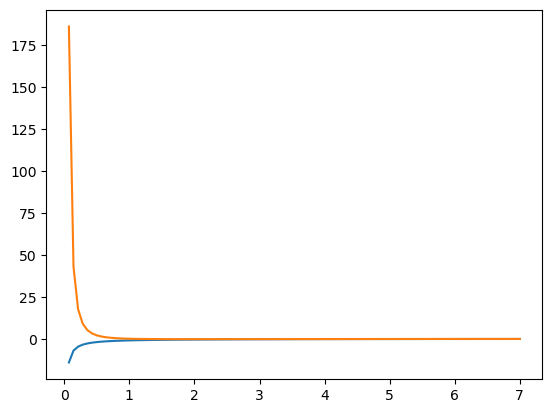

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu = 1
hbar = 1

r = np.linspace(0., 7., 100)

l = 0

def Veff(l):
  return -1/r + (hbar**2*l*(l+1))/2/mu/r**2

plt.plot(r, Veff(0))
plt.plot(r, Veff(1))
plt.show()

## Exercise 1

Plot the effective potential $V_{eff}(r)$ for different values of $l$. Note how different the potential is for $l = 0$ and for $l \neq 0$. Can you explain what happens?

## Exercise 2

Find the analytic expression for $R_{nl}(r)$ at [Explain Everything](https://drive.explaineverything.com/thecode/FNPFRHMN) and make Python Functions for
n = 1, l = 0, n = 2, l = 0, 1 and n = 3, l = 0, 1, 2.

Note that on Expliain Everything the functions are given as a function of $\rho$. The relation between $\rho$ and $r$ is: $\rho = \frac{2 Z}{n a}r$ where $a = 4\pi \epsilon_0 \frac{ \hbar^2 }{\mu e^2}$

```python
def R10(r):
    # n = 1, l = 0
```
Bonus points to those who can make a General R(n, l, r).
```python
def R(n, l, r):
 
```
I was not able to do this so please tell me if you come up with a solution.


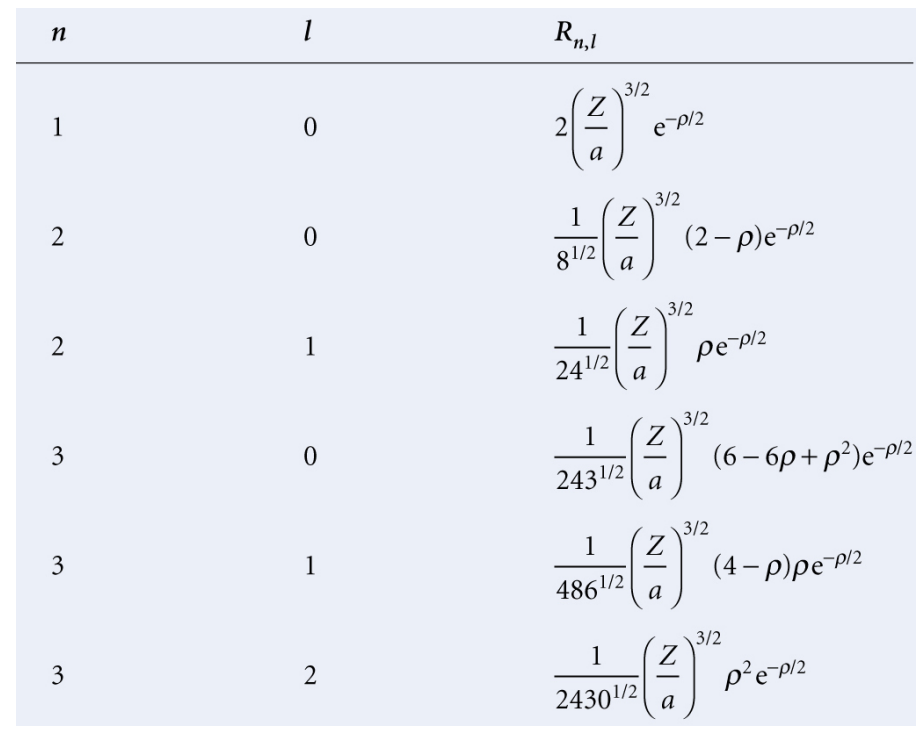

In [2]:
def R10(r):
    # n = 1, l = 0
#     a = 4*np.pi*epsilon0*hbar**2/(mu*np.exp(2))
    a0 = 1
    a = a0
    Z, n = 4, 1
    rho = 2*Z*r/(n*a)
    result = 2*(Z/a)**(3/2)*np.exp(-rho/2)
    return result

#def Rnl(n, l, r):

In [3]:
def radial(n, l, r, Z):
    a0 = 1
    #Z = 1
    rho = 2*Z*r/(n*a0)
    
    exponent = np.exp(-rho/2)
    
    if n==1 and l==0:
        return 2*(Z/a0)**(3/2)*exponent
    elif n==2 and l==0:
        return (2-rho)*exponent
    elif n==2 and l==1:
        return rho*exponent
    elif n==3 and l==0:
        return (6-6*rho+rho**2)*exponent
    elif n==3 and l==1:
        return rho*(4-rho)*exponent
    elif n==3 and l==2:
        return rho**2*exponent
    elif n==2 and l==0:
        return (2-rho)*exponent

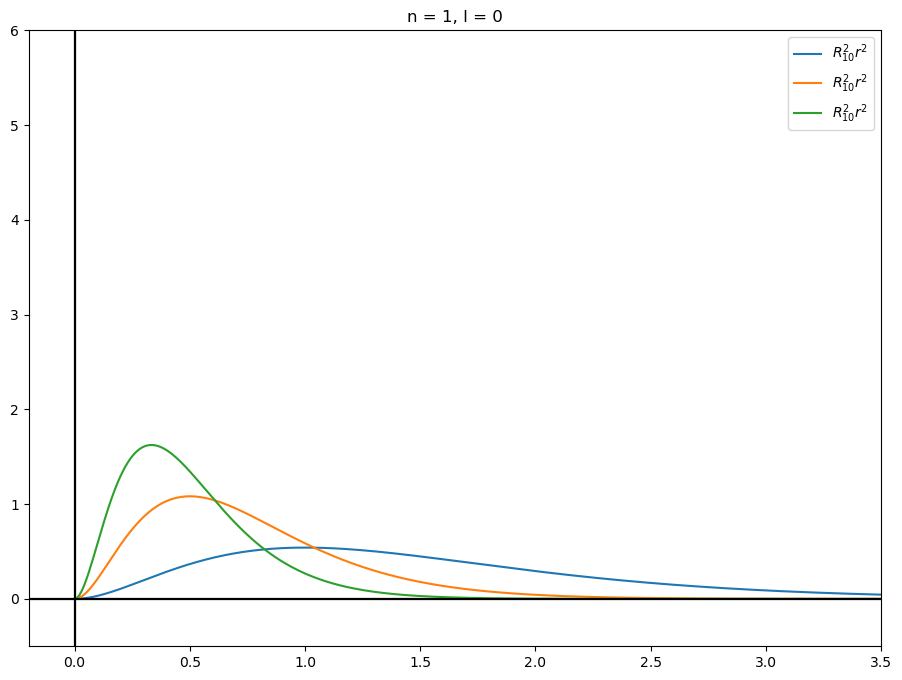

In [32]:
r = np.linspace(0, 10.0, 1000)

# n, l, Z = 1, 0, 1

def plot1(n, l, Z, r):
    eig = radial(n, l, r, Z)
    # print(eig)
    prob = eig**2*r**2
    plt.plot(r, eig, label=fr'$R_{{{n}{l}}}$')
    plt.plot(r, prob, label=fr'$R_{{{n}{l}}}^2r^2$')
    
    plt.title(f'n = {n}, l = {l}')
    
    plt.axhline(y=0, color='k', linestyle='-')
    plt.axvline(x=0, color='k', linestyle='-')
    
plt.figure(figsize=(11,8))

plot1(n=1, l=0, Z=1, r=r)
plot1(n=1, l=0, Z=2, r=r)
plot1(n=1, l=0, Z=3, r=r)

plt.xlim(-0.2, 3.5)
plt.ylim(-0.5, 6)
plt.legend()

plt.show()

## Exercise 3

Now let's study the radial probablilty density $P(r)$, the total wavefunction is
$\Psi_{nlm_l}$. To study the radial probability density we take the probability density $|\Psi_{nlm_l}|$ and integrate the non-radial parts ($\theta, \phi$).

\begin{align}
P(r) = \int_{surface} |\Psi_{nlm_l}(\theta, \phi, r)| d\tau = \int_0^\pi \int_0^{2 \pi} R_{nl}(r)^2 |Y_{lm_l}(\theta, \phi)| r^2\sin (\theta) d\theta d \phi
\end{align}

we then find $P(r) = R_{nl}(r)^2 r^2$

Plot the Quantity $P(r) = R_{nl}(r)^2 r^2 $ for various values of Z.

What happens when Z increases, why do you think this happens?

## Exercise 4

The total wavefunciton $Y_{n l m_l} = R_{nl}(r) Y_{lm_l}(\theta, \phi)$ where $R_{nl}$ is the solution to the Radial wavefunciton and 

Make a function that returns the probability density of finding the particle within a given volume $\theta \in (\theta_0, \theta_1)$ $r \in (r_0, r_1)$$\phi \in (\phi_0, \phi_1)$ 

```python 
def two_pz_probability(theta_0, theta_1, phi_0, phi_1, r_0, r_1):
```